In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('gymdata.csv', parse_dates=['Date'], dayfirst=True)

In [14]:
df.head()

,Date,Intensity
0,2023-07-23,1
1,2023-07-24,0
2,2023-07-26,1
3,2023-07-27,1
4,2023-07-28,1


In [15]:
df.set_index('Date', inplace=True)
date_range = pd.date_range(start=df.index.min(), end=df.index.max())
df = df.reindex(date_range, fill_value=0)

In [16]:
df.head()

,Intensity
2023-07-23,1
2023-07-24,0
2023-07-25,0
2023-07-26,1
2023-07-27,1


In [17]:
heatmap_data = df.pivot_table(index=df.index.day, columns=df.index.month, values='Intensity', fill_value=0)

Text(0.5, 1.0, 'Activity Heatmap')

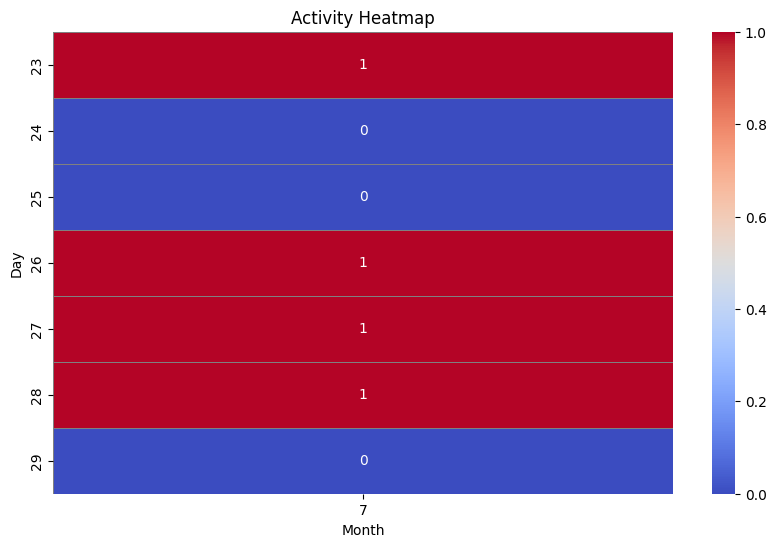

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='d', linewidths=0.5, linecolor='gray')
plt.xlabel('Month')
plt.ylabel('Day')
plt.title('Activity Heatmap')